<a href="https://colab.research.google.com/github/jamespan1118/Xenopus_signal_processing/blob/main/Noise_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries and packages
import librosa
from librosa import display
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import numpy as np
import scipy

##Step 1: Visualizing the waveplots

Before implementing processing procedures, we visualize waveplots of 
1. Noise
2. Noise+Male
3. Noise+Female 

so that we can intuitively understand the data

In [2]:
#loading the noise file
file_path = "/content/01-F818D-F8387-220616_0456_8min_selection (1)_noise.wav"
samples_noise, sampling_rate = librosa.load(file_path,sr=44100)

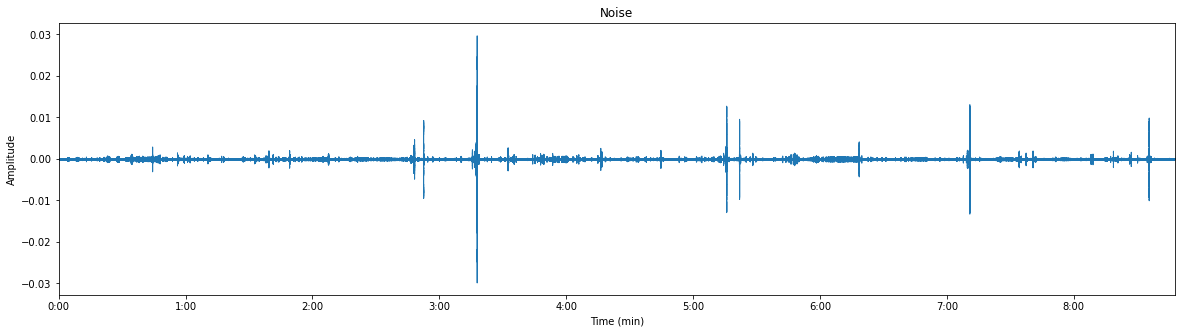

In [3]:
#plotting the audio data in time domain
plt.figure(figsize=(20,5))
librosa.display.waveplot(y=samples_noise,sr=sampling_rate)
plt.title("Noise")
plt.xlabel("Time (min)")
plt.ylabel("Amplitude")
plt.show()

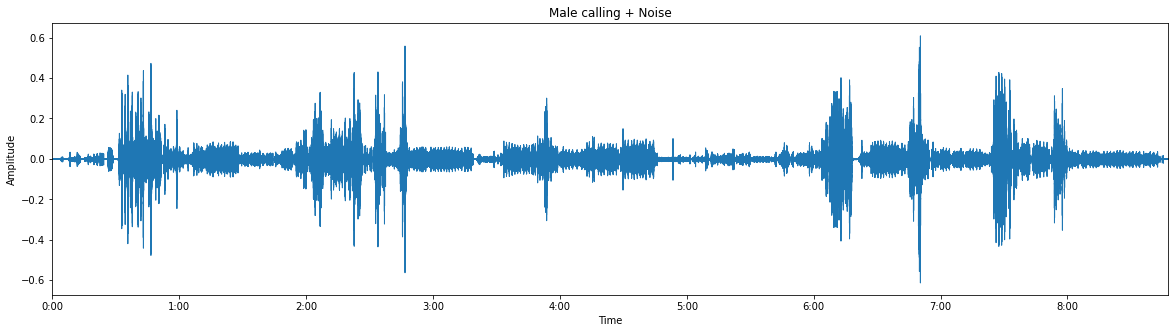

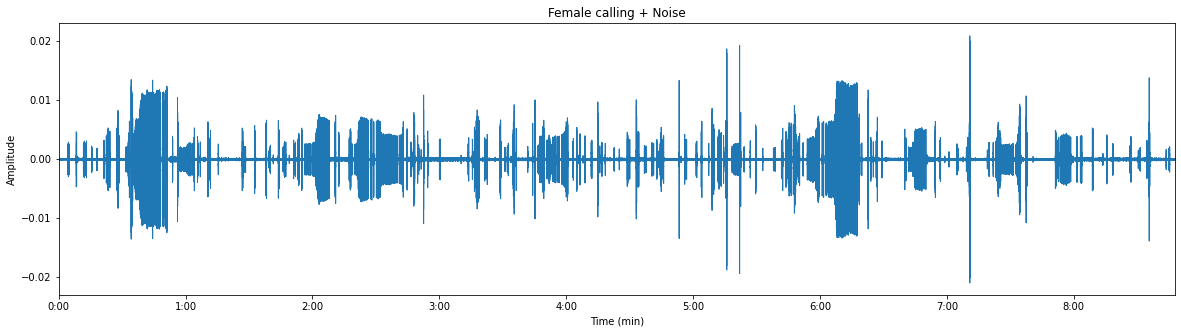

In [4]:
#plotting the waveplot of female and male for visual comparison
file_path_male = '/content/01-F818D-F8387-220616_0456_8min_selection (1)_male.wav'
file_path_female = '/content/01-F818D-F8387-220616_0456_8min_selection (1)_female.wav'
samples_male, sampling_rate = librosa.load(file_path_male,sr=44100)
samples_female, sampling_rate = librosa.load(file_path_female,sr=44100)

plt.figure(figsize=(20,5))
librosa.display.waveplot(y=samples_male,sr=sampling_rate)
plt.title('Male calling + Noise')
plt.ylabel("Amplitude")
plt.show()

plt.figure(figsize=(20,5))
librosa.display.waveplot(y=samples_female,sr=sampling_rate)
plt.title('Female calling + Noise')
plt.xlabel("Time (min)")
plt.ylabel("Amplitude")
plt.show()

## Step 2: Identifying the peaks in the Noise plot

In [5]:
#smooth the function
noise_smoothed = gaussian_filter1d(abs(samples_noise),100)

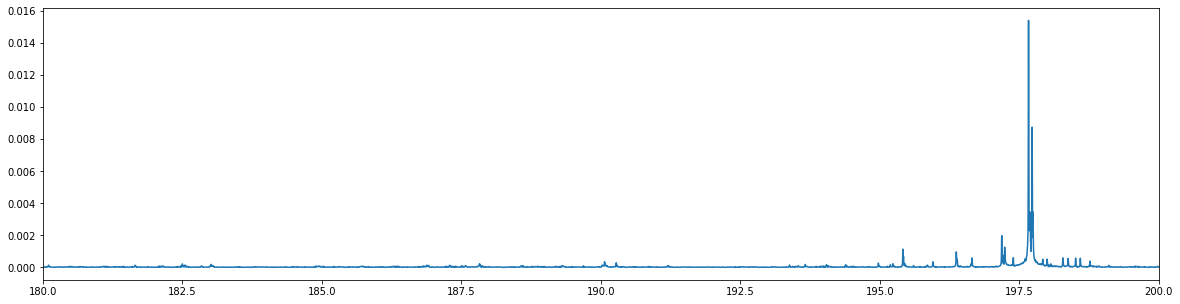

In [6]:
duration = len(samples_noise)/sampling_rate
x_time = np.arange(0,duration,1/sampling_rate)
plt.figure(figsize=(20,5))
plt.plot(x_time,noise_smoothed)
plt.xlim(180,200)
plt.show()

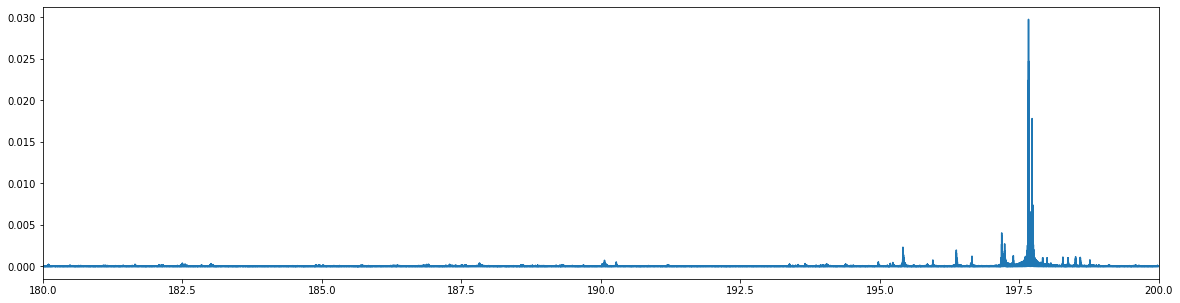

In [8]:
#compare against the original data
plt.figure(figsize=(20,5))
plt.plot(x_time,abs(samples_noise))
plt.xlim(180,200)
plt.show()

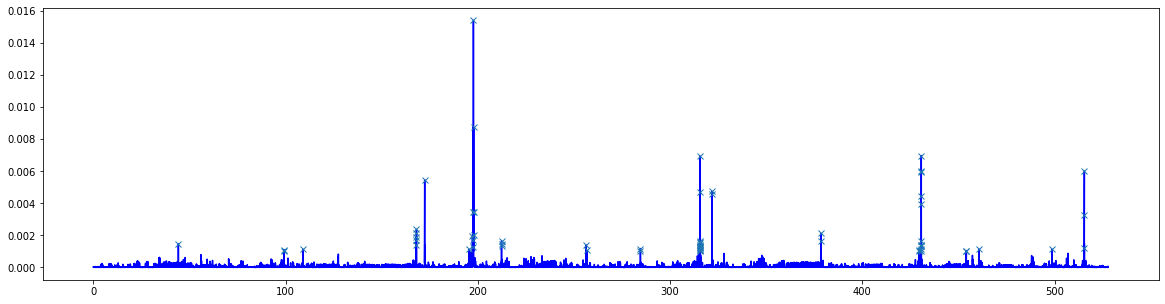

In [11]:
#identify peaks
noise_peaks, _ = scipy.signal.find_peaks(noise_smoothed,height=0.001,distance=100)
plt.figure(figsize=(20,5))
plt.plot(x_time,noise_smoothed,color = "blue")
plt.plot(x_time[noise_peaks],noise_smoothed[noise_peaks],'x')
#plt.xlim(4,5)
plt.show()

In [12]:
len(noise_peaks)

65